In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')
df.columns= ['Loan_ID','Gender','Married','Dependents','Education','Self_employed','Applicant Income','CoapplicantIncome','Loan Amount','Loan Amount Term','Credit History','Property Area','Loan Status']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_employed,Applicant Income,CoapplicantIncome,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_employed,Applicant Income,CoapplicantIncome,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_employed,Applicant Income,CoapplicantIncome,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_employed', 'Applicant Income', 'CoapplicantIncome', 'Loan Amount',
       'Loan Amount Term', 'Credit History', 'Property Area', 'Loan Status'],
      dtype='object')

In [11]:
df.shape

(613, 13)

There are 613 rows and 13 columns in this dataset.

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_employed         object
Applicant Income       int64
CoapplicantIncome    float64
Loan Amount          float64
Loan Amount Term     float64
Credit History       float64
Property Area         object
Loan Status           object
dtype: object

There are three types of data available in our dataset: int64 , float64 and object

# Data Analysis

In [13]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Loan_ID,613
Gender,2
Married,2
Dependents,4
Education,2
Self_employed,2
Applicant Income,504
CoapplicantIncome,287
Loan Amount,203
Loan Amount Term,10


We will drop Loan Id column as it is not useful in prediction.

In [14]:
#dropping columns
df.drop(columns={'Loan_ID'}, axis=1, inplace=True)

In [15]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_employed        32
Applicant Income      0
CoapplicantIncome     0
Loan Amount          21
Loan Amount Term     14
Credit History       50
Property Area         0
Loan Status           0
dtype: int64

There are null values present in this dataset. Now we will fill the the categorical column null values with mode of the column and numerical column null values with mean or median of the column.

In [17]:
for column in df.columns:
    if df.dtypes[column]=='float64':
        df[column]=df[column].fillna(df[column].mean())
    else:
        df[column]=df[column].fillna(df[column].mode()[0])

In [18]:
#checking null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_employed        0
Applicant Income     0
CoapplicantIncome    0
Loan Amount          0
Loan Amount Term     0
Credit History       0
Property Area        0
Loan Status          0
dtype: int64

In [19]:
df.describe()

,Applicant Income,CoapplicantIncome,Loan Amount,Loan Amount Term,Credit History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,84.106098,64.420943,0.349908
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


From above statistical information we can say :

1) statistical data is possible only for numerical column and not for categorical columns.
2) There is no null value present in the dataset as the count of all the columns is equal to rows present in the data.
3) The mean value in some columns are almost equal to median which means there is normal distribution in this column.
4) The mean value in some columns is greater than the median which means that data is skewed to the right in these columns.
5) We can see that there is difference between 75% and max in some columns hence there are outliers present inside the data.
6) We can also clearly see the standard deviation, min, and 25% percentile values from the describe method.1

In [20]:
#separating numerical and categorical columns
numerical_col=[]
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)

In [21]:
print('categorical column:',categorical_col)
print('numerical column:',numerical_col)

categorical column: ['Gender', 'Married', 'Dependents', 'Education', 'Self_employed', 'Property Area', 'Loan Status']
numerical column: ['Applicant Income', 'CoapplicantIncome', 'Loan Amount', 'Loan Amount Term', 'Credit History']


# Data Visualization

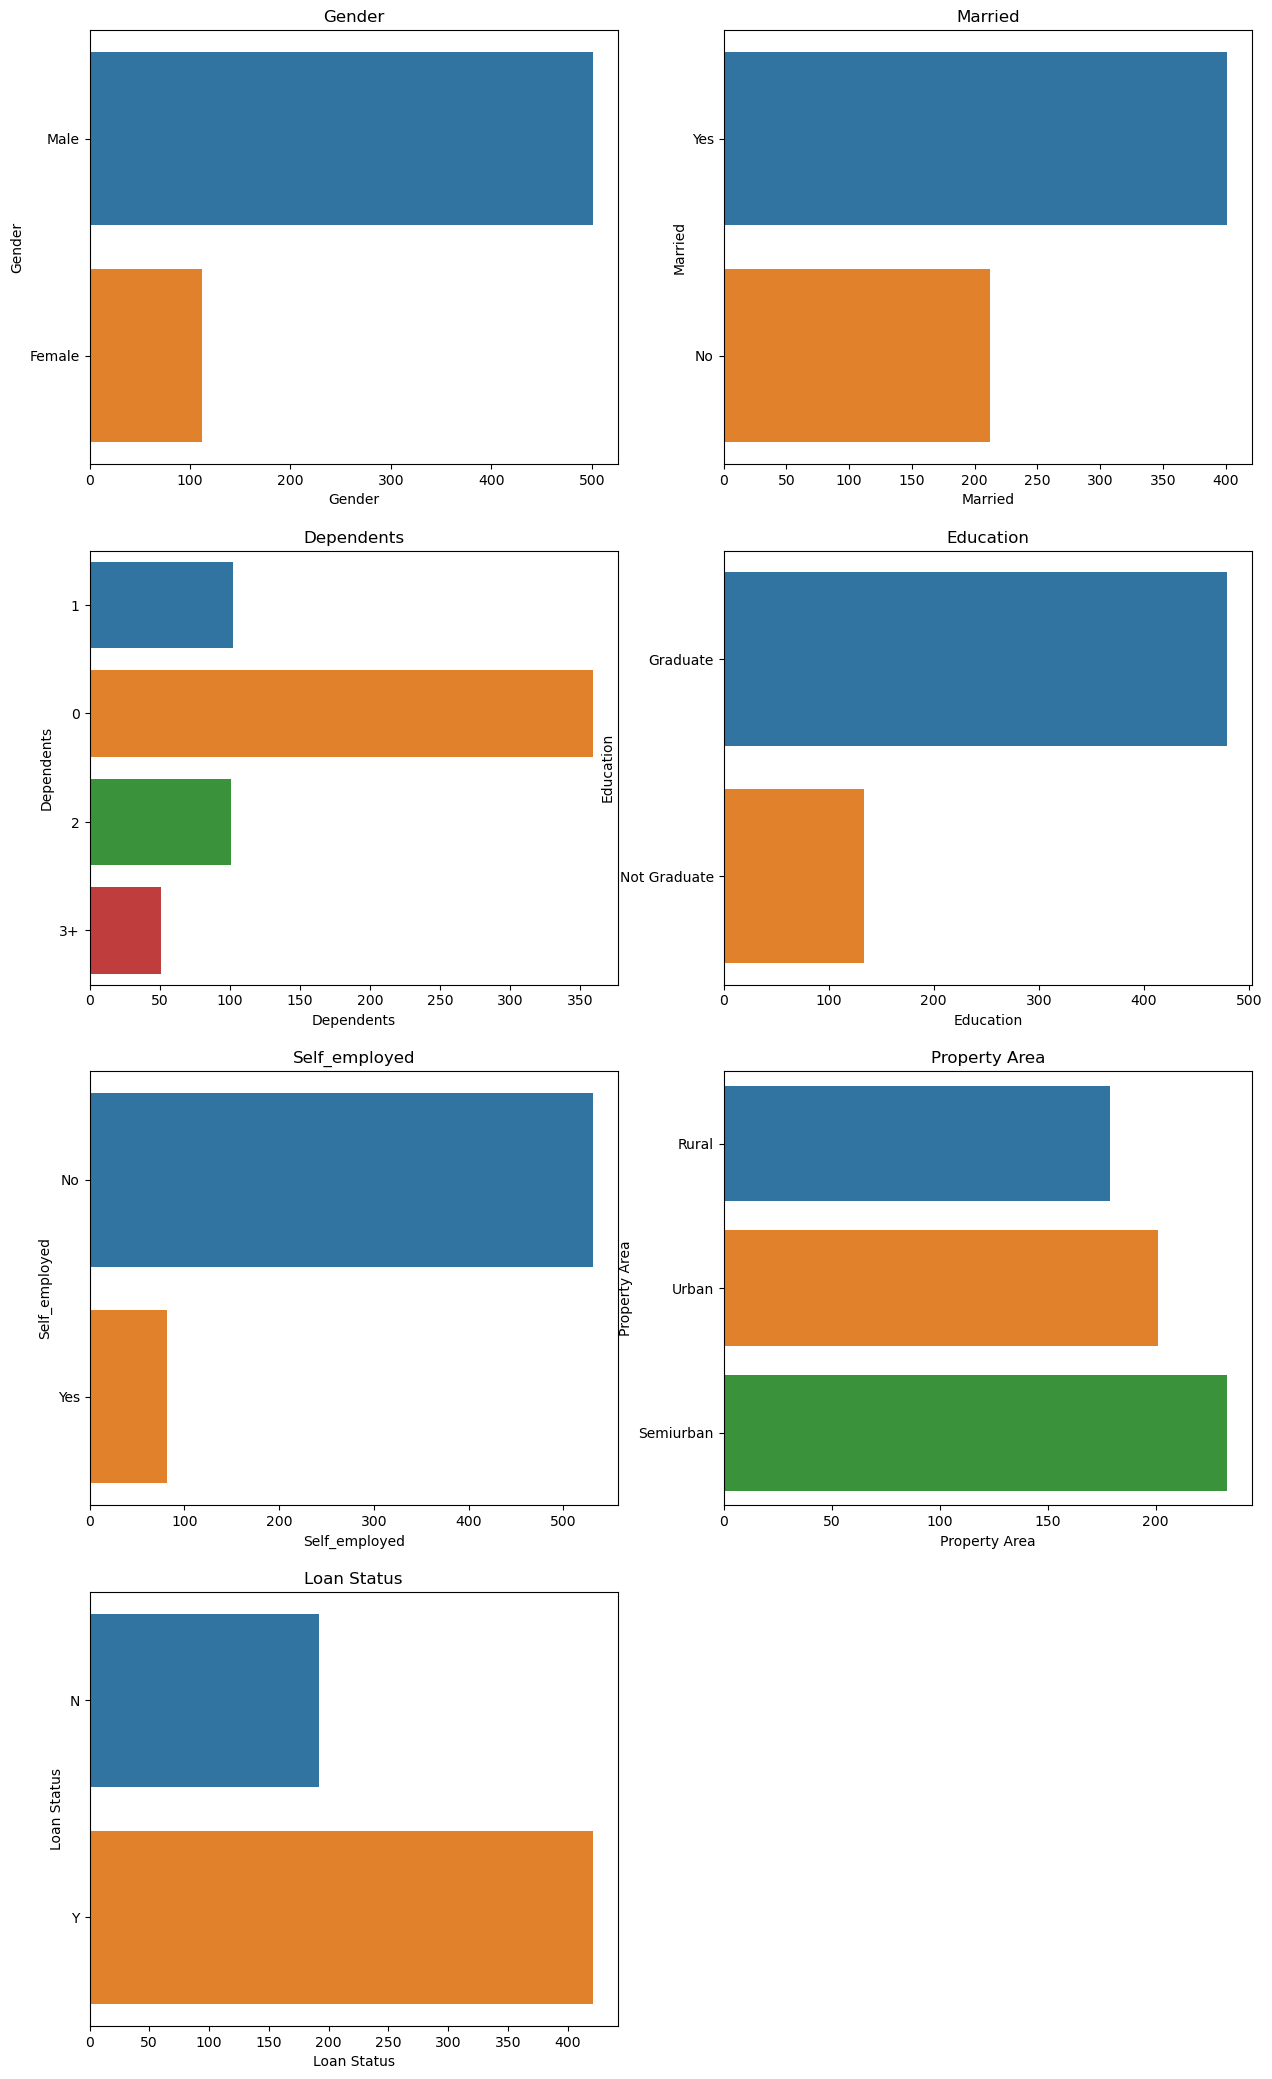

In [22]:
plt.figure(figsize=(15,80))
plotnumber=1
for categories in categorical_col:
    ax= plt.subplot(12,2,plotnumber)
    sns.countplot(y=categories,data=df)
    plt.xlabel(categories)
    plt.title(categories)
    plotnumber+=1
plt.show()

<Axes: >

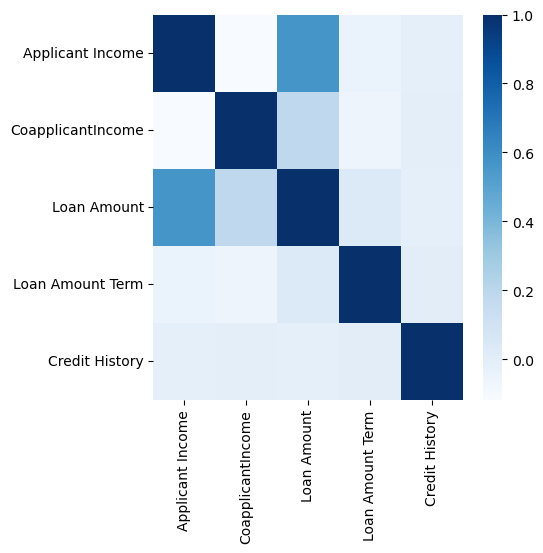

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap="Blues")

This heat map shows the correlation between different columns. Some columns are positively correlated with each other and some are negatively correlated with each other.

In [25]:
# Encoding categorical columns
from sklearn.preprocessing import OrdinalEncoder
encoder= OrdinalEncoder()
df[categorical_col]= encoder.fit_transform(df[categorical_col])
print("\nTransformed DataFrame:")
print(df)


Transformed DataFrame:
     Gender  Married  Dependents  Education  Self_employed  Applicant Income  \
0       1.0      1.0         1.0        0.0            0.0              4583   
1       1.0      1.0         0.0        0.0            1.0              3000   
2       1.0      1.0         0.0        1.0            0.0              2583   
3       1.0      0.0         0.0        0.0            0.0              6000   
4       1.0      1.0         2.0        0.0            1.0              5417   
..      ...      ...         ...        ...            ...               ...   
608     0.0      0.0         0.0        0.0            0.0              2900   
609     1.0      1.0         3.0        0.0            0.0              4106   
610     1.0      1.0         1.0        0.0            0.0              8072   
611     1.0      1.0         2.0        0.0            0.0              7583   
612     0.0      0.0         0.0        0.0            1.0              4583   

     Coapplican

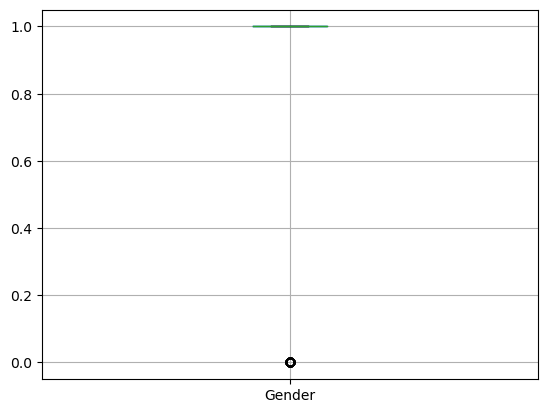

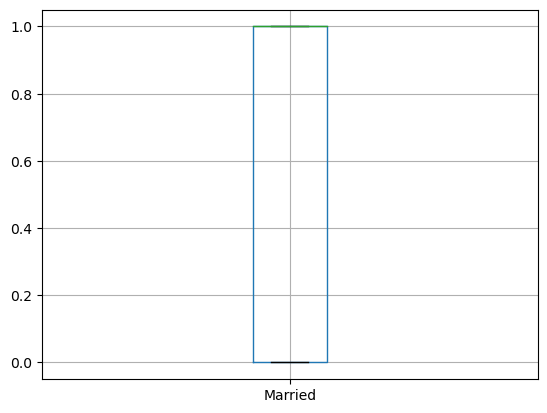

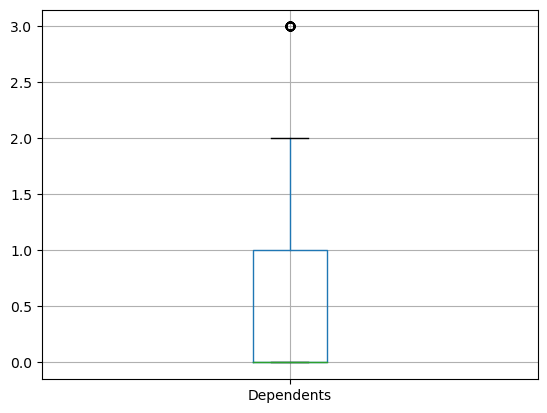

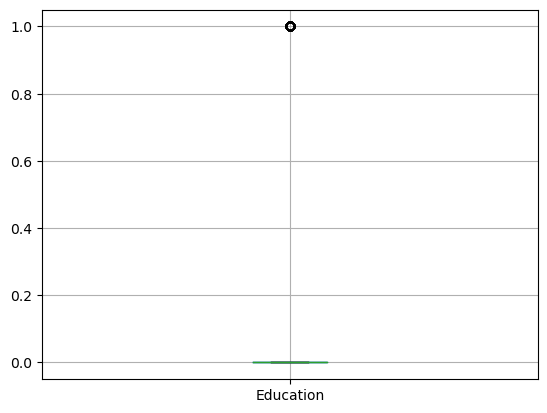

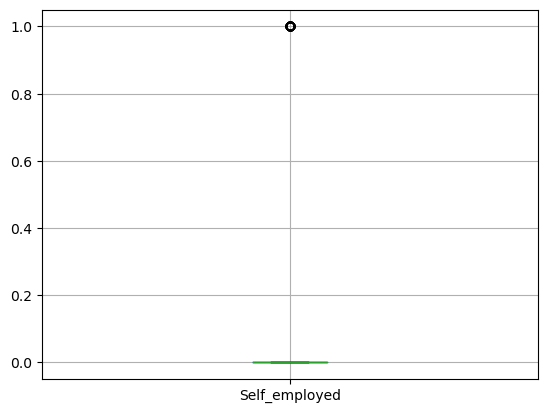

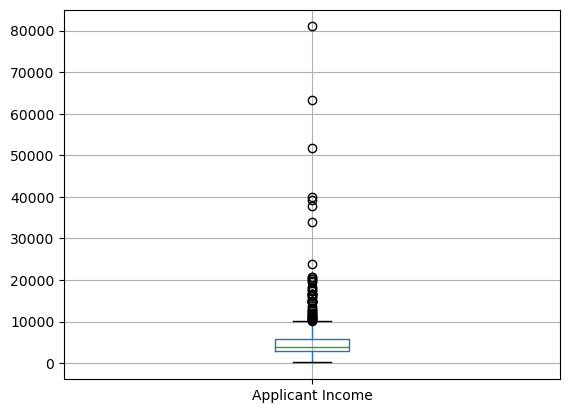

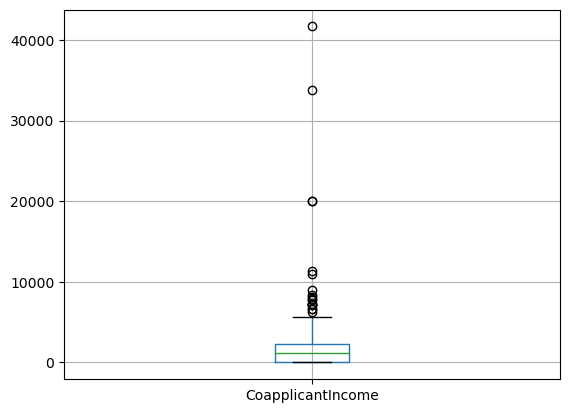

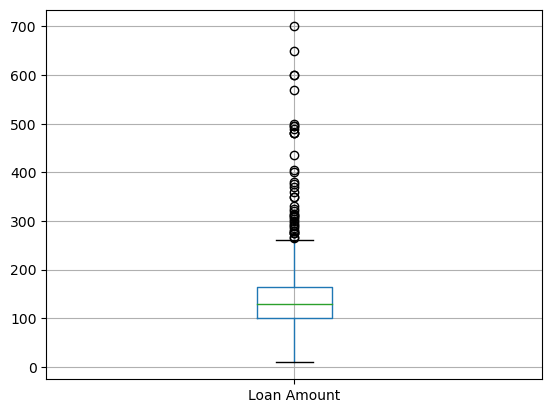

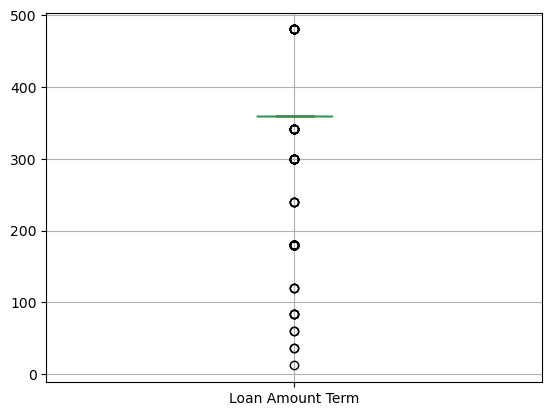

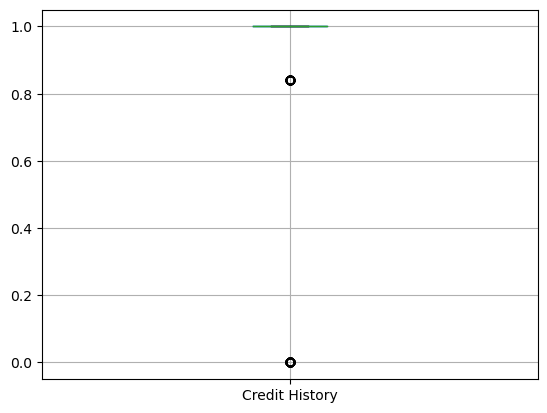

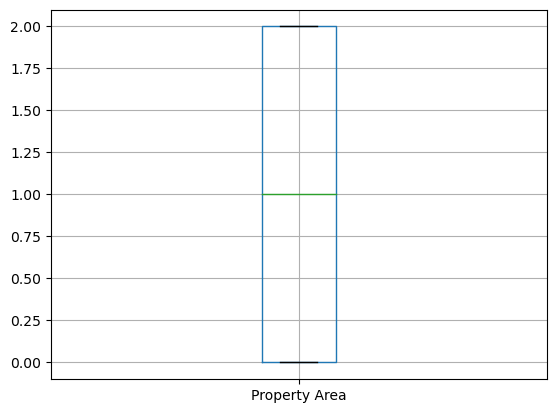

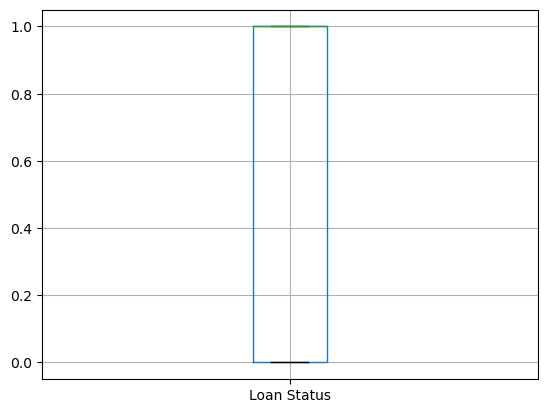

In [26]:
#detecting outliers
for column in df:
    plt.figure()
    df.boxplot([column])

In [27]:
#find the limits
for columns in df.columns:
    upper_limit= df[columns].mean() + 3*df[columns].std()
    lower_limit= df[columns].mean() - 3*df[columns].std()
    print('Upper Limit:',upper_limit)
    print('Lower Limit:',lower_limit)

Upper Limit: 1.9775195750425651
Lower Limit: -0.3429355619919944
Upper Limit: 2.08224936008277
Lower Limit: -0.7739296210941892
Upper Limit: 3.775511350049591
Lower Limit: -2.2844836175862957
Upper Limit: 1.4594932854917095
Lower Limit: -1.0222991582486425
Upper Limit: 1.1558121173000162
Lower Limit: -0.8882754125691842
Upper Limit: 23744.744806436378
Lower Limit: -12939.279879845839
Upper Limit: 10407.601321203041
Lower Limit: -7159.820179315146
Upper Limit: 398.7304553261396
Lower Limit: -105.9061310018152
Upper Limit: 535.2327799106336
Lower Limit: 148.70711992242167
Upper Limit: 1.8916432465104709
Lower Limit: -0.2078066568124246
Upper Limit: 3.397376763183625
Lower Limit: -1.3255986228899872
Upper Limit: 2.0793240195118052
Lower Limit: -0.7057514257108262


In [28]:
#capping the outliers
for column in df.columns:
    df.loc[(df[column] > upper_limit), column ] =upper_limit
    df.loc[(df[column] < lower_limit), column ] =lower_limit

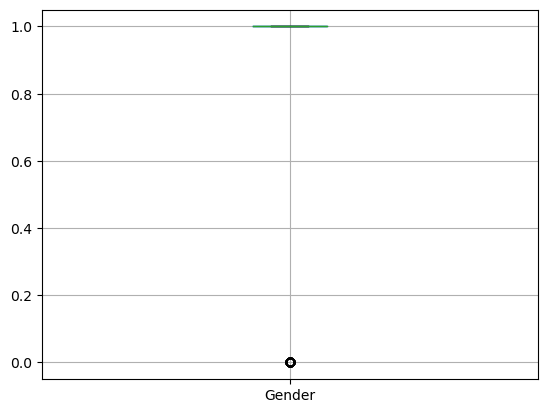

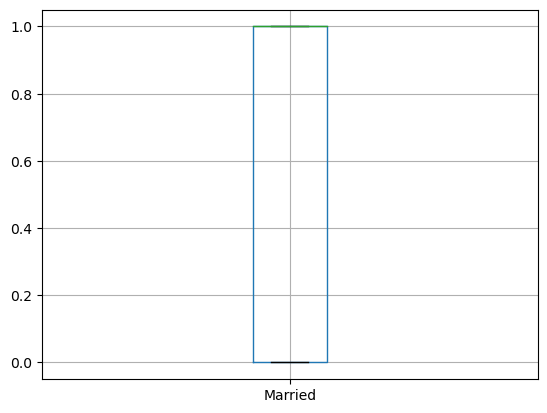

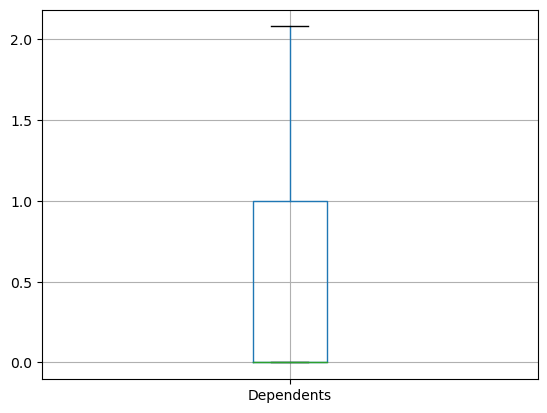

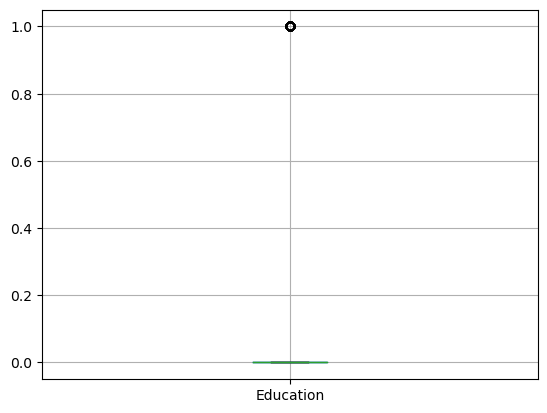

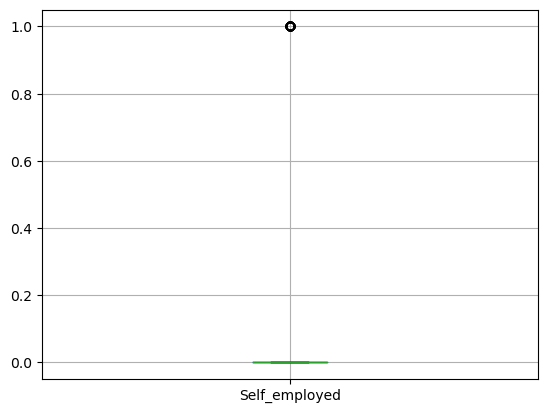

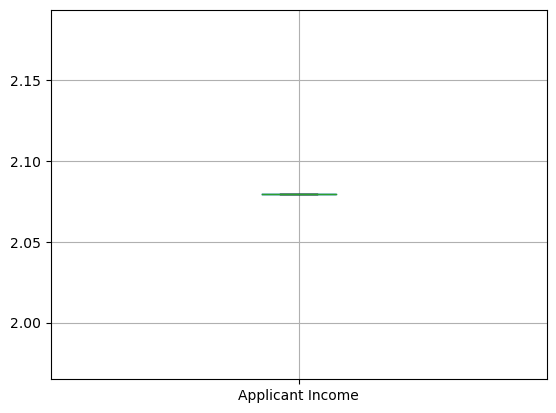

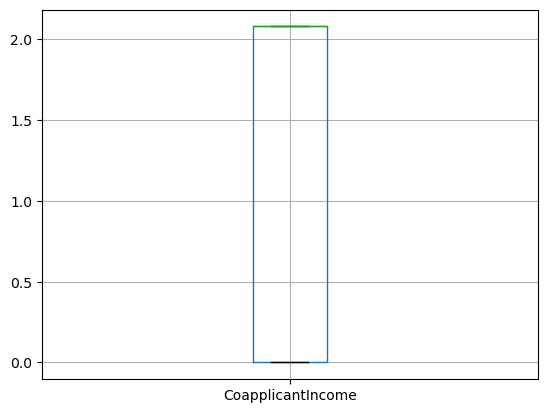

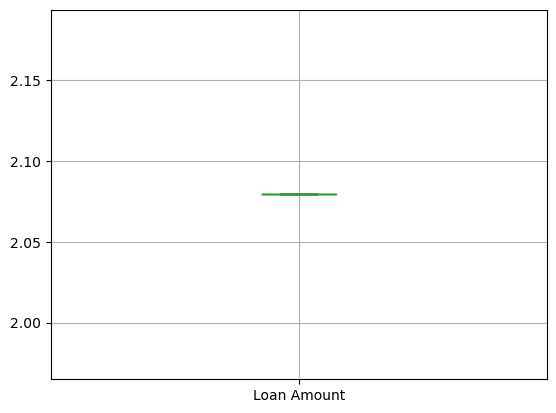

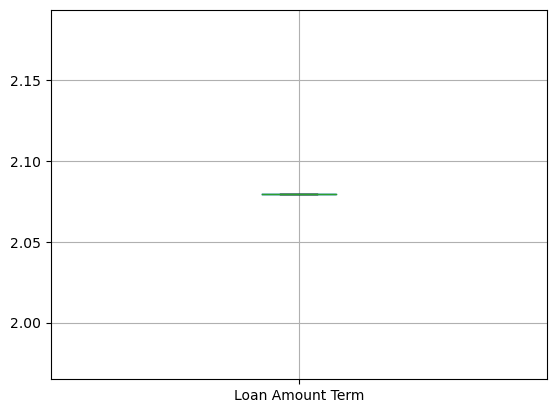

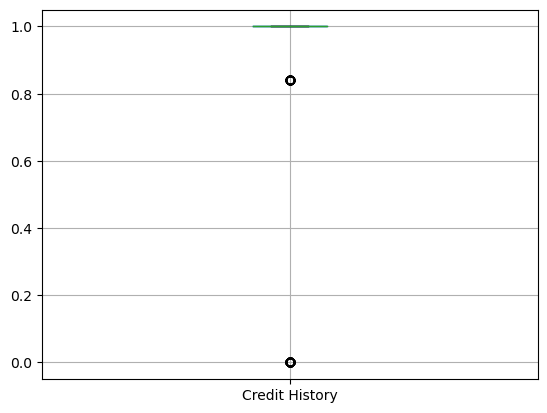

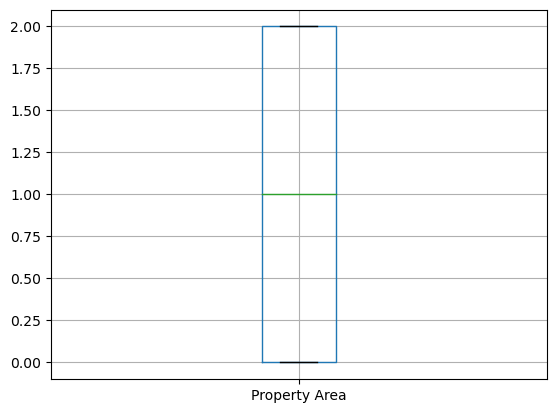

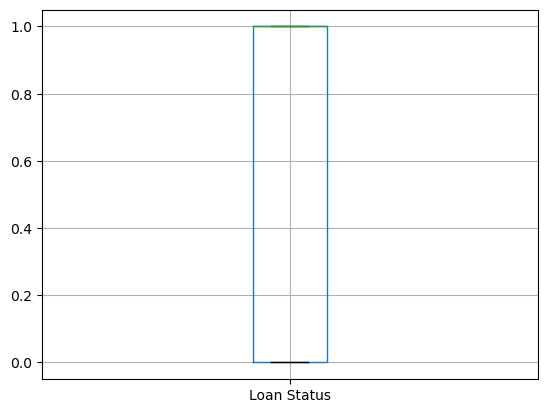

In [29]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [30]:
#separating target column and columns not necessary in the analysis from data
X= df.drop(["Loan Status"],axis=1)
Y= df["Loan Status"]

In [31]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_employed  Applicant Income  \
0       1.0      1.0    1.000000        0.0            0.0          2.079324   
1       1.0      1.0    0.000000        0.0            1.0          2.079324   
2       1.0      1.0    0.000000        1.0            0.0          2.079324   
3       1.0      0.0    0.000000        0.0            0.0          2.079324   
4       1.0      1.0    2.000000        0.0            1.0          2.079324   
..      ...      ...         ...        ...            ...               ...   
608     0.0      0.0    0.000000        0.0            0.0          2.079324   
609     1.0      1.0    2.079324        0.0            0.0          2.079324   
610     1.0      1.0    1.000000        0.0            0.0          2.079324   
611     1.0      1.0    2.000000        0.0            0.0          2.079324   
612     0.0      0.0    0.000000        0.0            1.0          2.079324   

     CoapplicantIncome  Loan Amount  Lo

# Splitting the data into training and testing data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(613, 11) (490, 11) (123, 11)


# Creating model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
model= LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
X_train_prediction= model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)
print('Accuracy:',training_data_accuracy)

Accuracy: 0.810204081632653


# Prediction

In [40]:
input_data= (0.0,0.0,0.000000,0.0,0.0,2.079324,0.000000,2.079324,2.079324,1.0,0.0)
data= np.asarray(input_data)
reshape= data.reshape(1,-1)

In [41]:
output= model.predict(reshape)
print(output)

[1.]


In [42]:
if(output[0]==1):
    print('Approved')
else:
    print('Not Approved')

Approved
